# Python implementaion of SVD(Singular Value Decomposition) and low-rank matrix Approximations 

### Singular Value Decompostion(SVD)
SVD can be considered as one of the most popular and widely used matrix decomposition methods.Many matrices used in  to Data Science and machine learning don't have the  property of symmetricity , so there we use the concept of Singular Value Decomposition.  

- The Singular Value Decomposition (SVD) of a matrix $A$ with dimensions $m \times n$ can be represented as:

$$ A = U \Sigma V^T $$

where $U$ is an $m \times m$  matrix, $\Sigma$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal (known as the singular values of $A$), and $V$ is an $n \times n$  matrix.


- The SVD of a matrix of any shape is possible , unlike Eigendecompositon and Spectral decompostion which are applicable only to square matrices.
- SVD can expose useful properties of original matrix , we can think of SVD of a matrix as a series of transformations where $V^T$ is a rotation 
  matrix $\Sigma$ is a scaling matrix and U is again a rotation matrix, so essentially  we can Decompose any linear transformation into simple linear transformations namely of 
  scalings and rotations.
- here's an illustration of singular value decomposition of a real $2\times2$ matrix

![alternative text](images\440px-Singular-Value-Decomposition.svg.png)

###  Low Rank Matrix Approximations

- **Rank** : let $A \in \mathbb{R}^{m \times n}$,Then the rank of matrix A is defined as the number of Linerly Independent rows(or columns) of the matrix or we can define it as the no of dimensions in the output of a linear Transformation.
- We would like to perform low rank approximation of matrices for Data Compression ;Large matrices with high dimensions can take up a lot of storage space, and performing operations on them can be computationally expensive. By approximating a matrix with a lower rank, we can reduce its storage requirements and computation time while preserving its essential features.
- Let $A \in \mathbb{R}^{m \times n}$(often large), having $\operatorname{rank}(A) \leq \min\{m, n\}$, the low rank approximation of A is to find another matrix $A_k$ $\in \mathbb{R}^{m \times n}$ which is having rank (k $\leq$ $\operatorname{rank}(A)$) and approximate A.

- We can use the SVD of $A$ to compute $A_k$ as follows:

\begin{equation}
A = U\Sigma V^T
\end{equation}


The low rank approximation of $A$ can be obtained by keeping only the first $k$ singular values and setting the rest to zero, as follows:

\begin{equation}
A_k = U \Sigma_k V^T
\end{equation}

 where $\Sigma_k$ is the diagonal matrix obtained from $\Sigma$ by setting its entries corresponding to the $k+1$ to $\min(m,n)$ singular values to zero.so keep only 'k' non-zero diagonal entires 

In [2]:
# importing utilities
import pandas as pd 
import numpy as np

In [3]:
np.set_printoptions(precision=4  , suppress=  True)

In [4]:
# a is a 3*4(wide) matrix and we will see the singular decomposition of this matrix 
a = np.array([[1, 2, 3, 4], [1 ,1 , 2, 3] , [0,  1 , 1 ,0]])
print(a)

[[1 2 3 4]
 [1 1 2 3]
 [0 1 1 0]]


In [5]:
# factorizing a as a product of u , s and vtranspose.
u  , s , vh  = np.linalg.svd(a , full_matrices= True)  # vh matrix is the transposed v matrix 
u.shape , s.shape , vh.shape
# s is an array contatining singular values of a.
u.dot(u.T) # <-- u is an orthogonal matrix hence this results in an identity matrix, same can be verified for vh
# vh.dot(vh.T)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

constructing the sigma matrix

In [6]:
sd = np.diag(s) # <= create  3*3 diagonal matrix with the diagonal entries as singular values of a 
b = np.zeros((3, 4))
b[:, :-1]= sd #assigning first 3 columns of b to be that of sd
# now b is the required sigma matrix 

reconstructing back the A matrix

In [7]:
np.dot(u , np.dot(b , vh))

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  1.,  2.,  3.],
       [ 0.,  1.,  1., -0.]])

rank-2 appoximation of a (we take only the first 2 singular values of a)

In [8]:
s2 = s[:2] #-<-- array containing only 2 singualr values of a

In [9]:
# constructing the sigma matrix with 2 singular values
i =np.diag(s2)
sigma_2  = np.zeros((3,4))
sigma_2[:2,:2] = i # sigma_2 is the required matrix
sigma_2

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [10]:
A_rank2  = np.dot(u.dot(sigma_2) , vh) 
print(A_rank2) # rank 2 approximation of a
print(a)
# A_rank2 is the 'best' rank-2 approximation of a.
# we can compare elements wise..

[[ 1.096   1.9567  3.0526  3.9542]
 [ 0.8764  1.0558  1.9322  3.0589]
 [-0.0559  1.0252  0.9693  0.0267]]
[[1 2 3 4]
 [1 1 2 3]
 [0 1 1 0]]


Another example for a 'tall' matrix $m \geq n$

In [11]:
a = np.array([[1 ,2 ,3, 4] , [1 ,1 ,2 ,3],[0, 1, 1, 0], [0 ,2 ,2 ,0], [0, 5, 5, 0]])
a  

array([[1, 2, 3, 4],
       [1, 1, 2, 3],
       [0, 1, 1, 0],
       [0, 2, 2, 0],
       [0, 5, 5, 0]])

In [42]:
u ,s , vh = np.linalg.svd(a)
print(u) # <-- u is a 5 * 5 orthogonal matrix 
print(s) # <-- s is a one dimensional array giving singular values of the 5*4 matrix a 
# note the last singular value is zero indicating that rank of this matrix is  3.
print(vh) # <-- vh is the 4*4 orthogonal matrix 

[[-0.5185 -0.5983  0.6108 -0.     -0.    ]
 [-0.3389 -0.512  -0.7893  0.      0.    ]
 [-0.1433  0.1125 -0.0114  0.0312 -0.9827]
 [-0.2866  0.225  -0.0229 -0.9302  0.0383]
 [-0.7166  0.5626 -0.0572  0.3658  0.1812]]
[9.2296 4.4454 0.2312 0.    ]
[[-0.0929 -0.6149 -0.7079 -0.3349]
 [-0.2498  0.375   0.1252 -0.8839]
 [-0.7718  0.3846 -0.3872  0.3264]
 [ 0.5774  0.5774 -0.5774  0.    ]]


constructing the sigma matrix

In [55]:
sd = np.diag(s) # <= create  3*3 diagonal matrix with the diagonal entries as singular values of a 
b = np.zeros((5,4))
b[:-2 , :-1] = sd[:-1 , : -1] 
b # b is the required sigma matrix 

array([[9.2296, 0.    , 0.    , 0.    ],
       [0.    , 4.4454, 0.    , 0.    ],
       [0.    , 0.    , 0.2312, 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### reconstructing back the a matrix 

In [56]:
np.dot(u , np.dot(b,  vh))

array([[1., 2., 3., 4.],
       [1., 1., 2., 3.],
       [0., 1., 1., 0.],
       [0., 2., 2., 0.],
       [0., 5., 5., 0.]])

rank-2 approximation of a  taking only first 2 singular values 

In [57]:
s2 = s[:2] #-<-- array containing only 2 singualr values of a

In [59]:
# constructing the sigma matrix with only 2 singular values 
s = np.diag(s2)

In [61]:
# constructing the sigma matrix with 2 singular values
i =np.diag(s2)
sigma_2  = np.zeros((5 , 4))
sigma_2[:2,:2] = i # sigma_2 is the required matrix
sigma_2

array([[9.2296, 0.    , 0.    , 0.    ],
       [0.    , 4.4454, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [62]:
A_rank2  = np.dot(u.dot(sigma_2) , vh) 
print(A_rank2) # rank 2 approximation of a
print(a)
# A_rank2 is the 'best' rank-2 approximation of a.
# we can compare elements wise..

[[ 1.109   1.9457  3.0547  3.9539]
 [ 0.8592  1.0702  1.9293  3.0596]
 [-0.002   1.001   0.999   0.0009]
 [-0.0041  2.002   1.9979  0.0017]
 [-0.0102  5.0051  4.9949  0.0043]]
[[1 2 3 4]
 [1 1 2 3]
 [0 1 1 0]
 [0 2 2 0]
 [0 5 5 0]]


LOW RANK MATRIX APPROXIMATION (IMAGE EXAMPLE)

(1391, 2088)


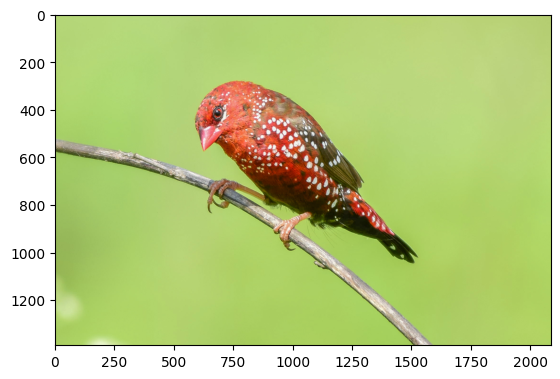

In [72]:
# importing utilities and displaying the image 
from PIL import Image
from skimage import io,color
image = io.imread(r"C:\Users\Joshi Mayuresh\Desktop\Essential mathematics for machine learning NPTEL\images\red_avadavat.jpg")
# image is a color image, a color image has 3 color channels namely red , green and blue.
# so in order to make it a 2 dimensional array (matrix) we will covert it into a gray image.
gray_image_matrix = color.rgb2gray(image)
import matplotlib.pyplot as plt
print(gray_image_matrix.shape) # shape of the matrix 
plt.imshow(image)
plt.show()

In [73]:
# scaling before svd (standardization)
gray_image_matrix_scaled = (gray_image_matrix - gray_image_matrix.mean()) / gray_image_matrix.std()

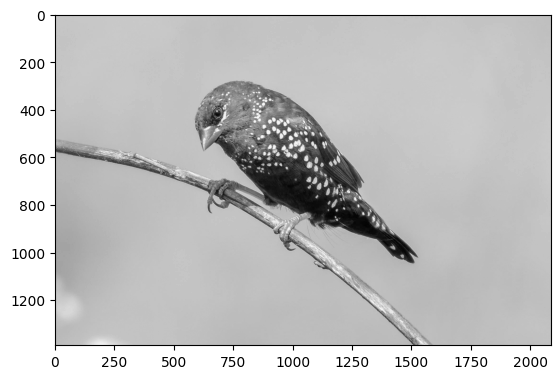

In [75]:
# the gray scaled image
plt.imshow(gray_image_matrix_scaled, cmap= 'gray') 

In [81]:
#perform SVD using np.linalg.svd
U , s_array , Vh = np.linalg.svd(gray_image_matrix_scaled)

In [88]:
s_array

array([1152.5211,  601.4314,  396.2054, ...,    0.1348,    0.1325,
          0.131 ])

In [82]:
# computing variance explained by each singular vector
var_explained = np.round(s_array**2/np.sum(s_array**2), decimals =3)

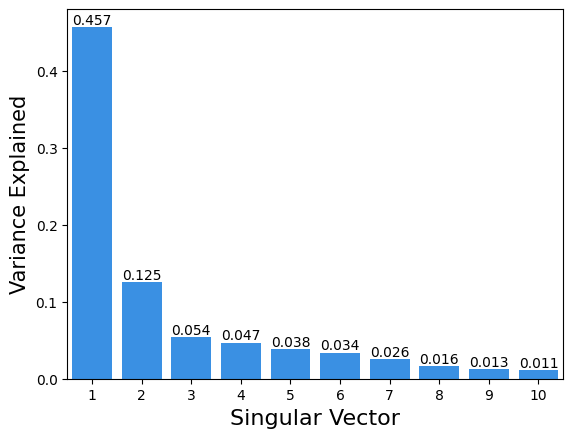

In [97]:
#plotting the first 10 singluar vectors and variance explained by those singular vectors
import seaborn as sns 
ax = sns.barplot(x= list(range(1 ,11)),
            y = var_explained[0:10], color = 'dodgerblue')
plt.xlabel("Singular Vector" , fontsize = 16)
plt.ylabel("Variance Explained" , fontsize = 15)
for i in ax.containers:
    ax.bar_label(i,)
# we can see that the first singular vector is capturing   45 % of the variance 

so ,  instead of using all singular values we can take only first 10 - 15 singular values and reconstruct our image using only those , then we can save a lot of memory and storage to save this image , essentially  we will have a compressed version of this image.

In [103]:
np.sum(s_array == np.zeros((1 , 1391))) # to check whether s_array has 0 singular values
#  we can see that none of the singular values are zero indicating that the image matrix is full rank 

0

In [106]:
#using low-rank matrix approximation, to construct a rank k approximation of gray_image_matrix_scaled, which 
#is having rank 1391(since s_array has no non zero entry)# 

In [107]:
s_array == np.zeros((1 , 1391)) # to check whether s_array has 0 singular values 
s1 = np.diag(s_array)
s2 = np.zeros(((1391, 2088)))
s2[: , :1391] = s1 #s2 is the required sigma matrix

In [123]:
k  = 5
reconst_img_k = U[: , :k].dot(np.dot(s2[:k , :k] , Vh[:k ,:])) #k rank approximation of gray_image_matrix_scaled 

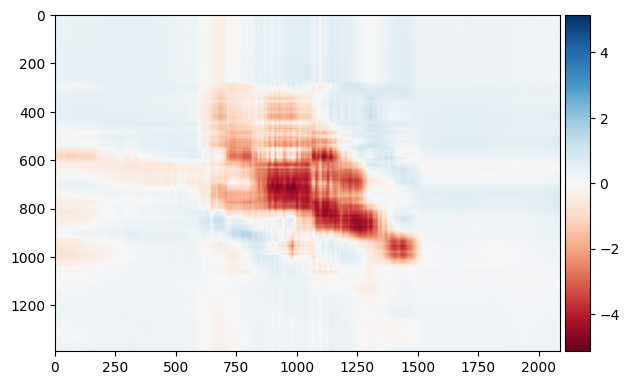

In [124]:
# rank-5 approximation of the image
io.imshow(reconst_img_k )

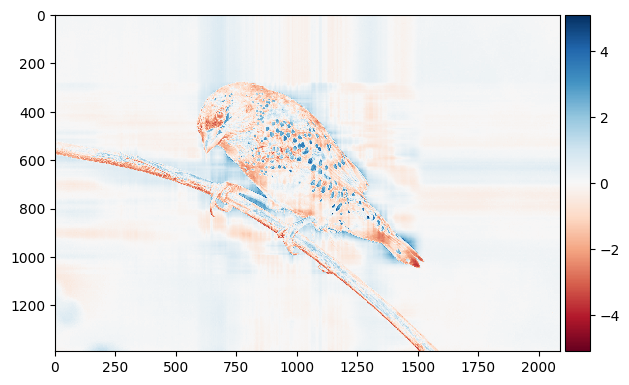

In [126]:
# error 
io.imshow(gray_image_matrix_scaled  - reconst_img_k )